In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt 
from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.metrics import explained_variance_score

%matplotlib inline 
movies = pd.read_csv('D:\\movie_metadata.csv', 
                  error_bad_lines=False)
print (movies.shape)
print (movies.columns)

(5043, 28)
Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [2]:
numerical_data = movies.select_dtypes(exclude=["object"])
numerical_data=numerical_data.dropna(axis=0)

In [4]:
print(numerical_data)

      num_critic_for_reviews  duration  director_facebook_likes  \
0                      723.0     178.0                      0.0   
1                      302.0     169.0                    563.0   
2                      602.0     148.0                      0.0   
3                      813.0     164.0                  22000.0   
5                      462.0     132.0                    475.0   
6                      392.0     156.0                      0.0   
7                      324.0     100.0                     15.0   
8                      635.0     141.0                      0.0   
9                      375.0     153.0                    282.0   
10                     673.0     183.0                      0.0   
11                     434.0     169.0                      0.0   
12                     403.0     106.0                    395.0   
13                     313.0     151.0                    563.0   
14                     450.0     150.0                    563.

In [6]:
score=numerical_data["imdb_score"]
numerical_data = numerical_data.drop(["title_year"],axis=1)
numerical_data = numerical_data.drop(["imdb_score"],axis=1)

E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


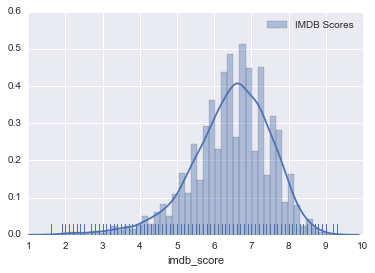

In [7]:
sns.distplot(score,rug=True,label="IMDB Scores").legend()

In [26]:
reg= linear_model.LinearRegression()
x_trainA=numerical_data.iloc[:-1000,0:13]
y_trainA=score.iloc[:-1000]
x_testA=numerical_data.iloc[-1000:,0:13]
y_testA=score.iloc[-1000:]

reg.fit(x_trainA,y_trainA)
print('Slope: \n', reg.coef_)
print('Intercept:\n',reg.intercept_)
print('Score: %.2f' % reg.score(x_testA, y_testA))
print("Mean squared error: %.2f"
      % mean_squared_error(y_testA,reg.predict(x_testA)))
print('explained_variance_score: %.2f'%explained_variance_score(y_testA, reg.predict(x_testA)))

Slope: 
 [  1.31239970e-03   1.36228700e-02   1.07484215e-05   4.43485932e-05
   5.81983361e-05  -8.79592002e-10   3.74479646e-06  -5.58822615e-05
  -3.17278866e-02  -5.84574341e-04  -2.64562868e-11   6.05904071e-05
  -1.38484334e-01]
Intercept:
 4.83930941186
Score: 0.05
Mean squared error: 1.12
explained_variance_score: 0.23


E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


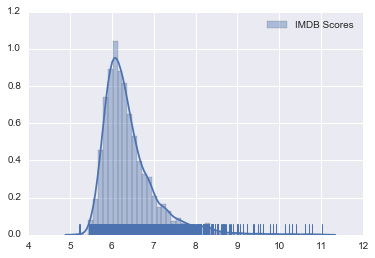

In [7]:
sns.distplot(reg.predict(x_trainA),rug=True,label="IMDB Scores").legend()

we can see that the linear regression model does not perform well.From the graph we could see that it loses the scores that are smaller than 5. Although the mean of the data predicts well, the trend of the result is far away from the original data in that it ranges smaller.

In [8]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_trainA,y_trainA)
print('Score: %.2f' % neigh.score(x_testA, y_testA))
print("Mean squared error: %.2f"
      % mean_squared_error(y_testA,neigh.predict(x_testA)))
print('explained_variance_score: %.2f'%explained_variance_score(y_testA, neigh.predict(x_testA)))

Score: -0.11
Mean squared error: 1.30
explained_variance_score: -0.11


E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


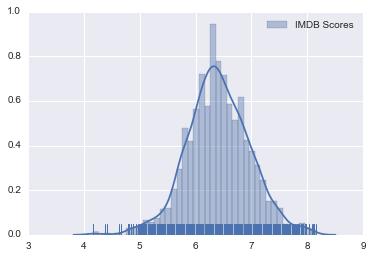

In [9]:
sns.distplot(neigh.predict(x_trainA),rug=True,label="IMDB Scores").legend()

In [10]:
neigh2 = KNeighborsRegressor(n_neighbors=15)
neigh2.fit(x_trainA,y_trainA)
print('Score: %.2f' % neigh2.score(x_testA, y_testA))
print("Mean squared error: %.2f"
      % mean_squared_error(y_testA,neigh2.predict(x_testA)))
print('explained_variance_score: %.2f'%explained_variance_score(y_testA, neigh2.predict(x_testA)))

Score: -0.01
Mean squared error: 1.19
explained_variance_score: -0.01


E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


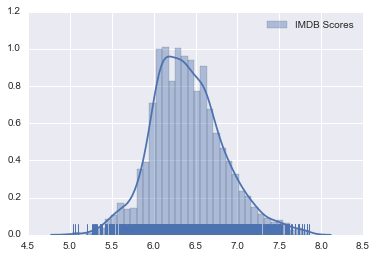

In [11]:
sns.distplot(neigh2.predict(x_trainA),rug=True,label="IMDB Scores").legend()

In [12]:
neigh3 = KNeighborsRegressor(n_neighbors=25)
neigh3.fit(x_trainA,y_trainA)
print('Score: %.2f' % neigh3.score(x_testA, y_testA))
print("Mean squared error: %.2f"
      % mean_squared_error(y_testA,neigh3.predict(x_testA)))
print('explained_variance_score: %.2f'%explained_variance_score(y_testA, neigh3.predict(x_testA)))

Score: 0.01
Mean squared error: 1.16
explained_variance_score: 0.02


E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


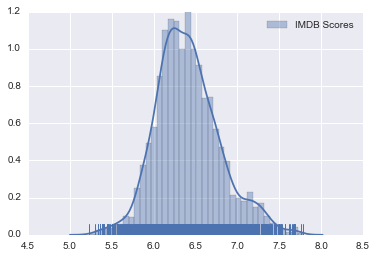

In [13]:
sns.distplot(neigh3.predict(x_trainA),rug=True,label="IMDB Scores").legend()

In [14]:
neigh4 = KNeighborsRegressor(n_neighbors=50)
neigh4.fit(x_trainA,y_trainA)
print('Score: %.2f' % neigh4.score(x_testA, y_testA))
print("Mean squared error: %.2f"
      % mean_squared_error(y_testA,neigh4.predict(x_testA)))
print('explained_variance_score: %.2f'%explained_variance_score(y_testA, neigh4.predict(x_testA)))

Score: -0.01
Mean squared error: 1.18
explained_variance_score: -0.01


E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


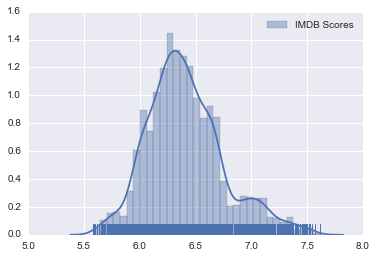

In [15]:
sns.distplot(neigh4.predict(x_trainA),rug=True,label="IMDB Scores").legend()

In general, KNN performs better than linear regression. We have tried three different neighbors in KNN methods,namely 15,25,50. Although normaly increasing n should lead in better performance. In this case n=25 performs best in that it has relatively low Mean squared error. The general curve is much more similar to the original data. Yet,still it does not predict the score less than 5 or more than 8. 

We now apply different methods to classify whether a movie is a good movie or a bad movie. First we suppose movies that have imdb_score above average are good movies. In this case, movies have score over 6.5 are good ones. Then we use GradientBoostingClassifier,DecisionTreeClassifier,KNeighborsClassifier and RandomForestClassifier respectively to classify our data. Using roc_auc_score to rank these methods, we found that GradientBoostingClassifier performs best, following by  RandomForestClassifier. KNeighborsClassifier peforms worst. So when classify a movie is bad or good, we shall apply GradientBoostingClassifier.

In [17]:
mid = np.percentile(y_trainA,50)
y_train = [int(i) for i in list(y_trainA>=mid)]
y_test =  [int(i) for i in list(y_testA>=mid)]

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(x_trainA,y_train)
roc_auc_score(y_test, model.predict(x_testA))


0.72245070946369649

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_trainA,y_train)
roc_auc_score(y_test, model.predict(x_testA))

0.6463125618969775

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_trainA,y_train)
roc_auc_score(y_test, model.predict(x_testA))

0.52621837037421448

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_trainA,y_train)
roc_auc_score(y_test, model.predict(x_testA))

0.68449948320078191